In [283]:
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

In [284]:
#define functions for demand and supply
def demand(p):
    return (500-p)/3.2
def supply(p, t):
    return ((100+p)/4.3) + t

#make supply = demand
p,t = sp.symbols('p t', real=True, positive=True)
equ = sp.Eq(demand(p), supply(p,t))
equ

Eq(156.25 - 0.3125*p, 0.232558139534884*p + t + 23.2558139534884)

In [285]:
#finner likevetskvantum
p_eq=demand(x_eq[0])
print(p_eq)

#finner likevektsprisen
x_eq=sp.solve(equ, p)
print(x_eq[0])


131.25 - 0.179166666666667*t
244.0 - 1.83466666666667*t


In [286]:
producer=sp.integrate(p_eq-supply(p, t),(p,0,x_eq))
consumer=sp.integrate(demand(p)-p_eq,(p,0,x_eq))
welfare=(sp.integrate(demand(p)-supply(p, t),(p,0,x_eq)))
avprov = sp.integrate(t, (p, 0, x_eq))

print(f"""    
Produdusentoverskudd uten gitt t verdi:{sp.simplify(producer)}\n
Konsumentoversludd uten gitt t verdi:{sp.simplify(consumer)}\n
Samfunnsoverskuddet uten gitt t verdi:{sp.simplify(welfare)}\n
Avgiftsproveny utifra avgift t er:{avprov}
""")

    
Produdusentoverskudd uten gitt t verdi:1.77198222222222*t**2 - 381.743333333333*t + 19427.7906976744

Konsumentoversludd uten gitt t verdi:-0.854648888888889*t**2 + 137.743333333333*t - 3202.5

Samfunnsoverskuddet uten gitt t verdi:0.917333333333333*t**2 - 244.0*t + 16225.2906976744

Avgiftsproveny utifra avgift t er:t*(244.0 - 1.83466666666667*t)



In [287]:
x_eq_fn=sp.lambdify(
    (t, p), 
    x_eq[0]
)

x_eq_fn(p,t)
x_eq_fn(0,0)

244.0

In [288]:
p_eq_fn=sp.lambdify(
    (t,p), 
    p_eq
)

p_eq_fn(t,p)
p_eq_fn(0,0)

131.25

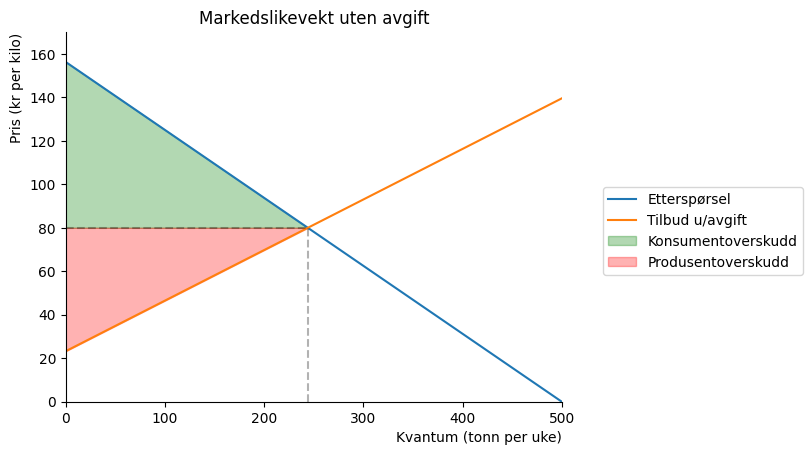

In [301]:
#liste with x values
x_num=np.linspace(0.1,500,100)

equ_t0 = sp.Eq(demand(p),supply(p, 0))

x_eq_t0 = sp.solve(equ_t0,p)
x_eq_t0 = float(x_eq_t0[0])

p_eq_t0=demand(x_eq_t0)

#create figure and ax
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (kr per kilo)', loc='top')
                ax.set_xlabel('Kvantum (tonn per uke)', loc='right')
                ax.set(xlim=(0,500))
                ax.set(ylim=(0,170))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

#call function
fig, ax = create_ax()

#plot supply og demand
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

#tittel
ax.set_title('Markedslikevekt uten avgift')

#linspace
q = np.linspace(0,x_eq_t0,100)

#vlines og hlines for for equilibriums
ax.vlines(x_eq_t0, 0, demand(x_eq_t0), color = 'black',linestyle = 'dashed', alpha=0.3)
ax.hlines(p_eq_t0, 0, x_eq_t0, color = 'black', linestyle = 'dashed', alpha=0.3)

#fill between for supply og demand
ax.fill_between(q,p_eq_t0,demand(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q, 0),p_eq_t0, color = "red",alpha = 0.3,label='Produsentoverskudd')

#add legend
ax.legend(bbox_to_anchor=(1.5,0.6))



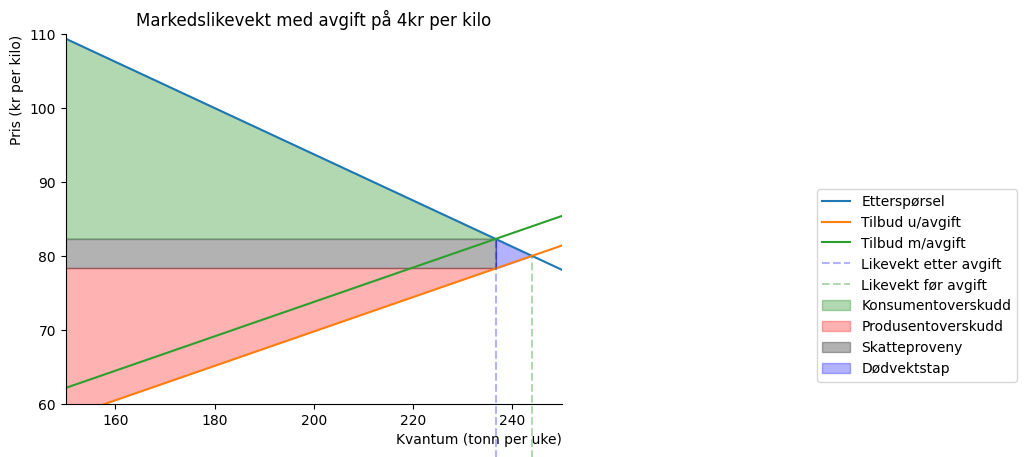

In [298]:
#liste med tall fra 0.1 til 100. 
x_num=np.linspace(0.1,500,100)

equ_t4 = sp.Eq(demand(p),supply(p, 4))

x_eq_t4 = sp.solve(equ_t4,p)
x_eq_t4 = float(x_eq_t4[0])

p_eq_t4=demand(x_eq_t4)

#lag en akse (funksjon for å kunne brukes flere ganger.)
def create_ax2():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (kr per kilo)', loc='top')
                ax.set_xlabel('Kvantum (tonn per uke)', loc='right')
                ax.set(xlim=(150,250))
                ax.set(ylim=(60,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

#skaper figur med funksjonen vår ovenfor
fig, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')
ax.plot(x_num, supply(x_num, 4), label='Tilbud m/avgift')

#tittel
ax.set_title('Markedslikevekt med avgift på 4kr per kilo')

#rekke med tall fra 0 til likevekt
q2 = np.linspace(0,x_eq_t4,100)

#rekke med tall fra likevekt med avgift til likevekt uten avgift
q3 = np.linspace(x_eq_t0,x_eq_t4,100)

#vertikallinjer for å markere likevekt.
ax.vlines(x_eq_t4,42,demand(x_eq_t4), color='b',ls='dashed', alpha= 0.3, label='Likevekt etter avgift', clip_on=False) #clipon false gjør at vlines clipper gjennom rammen.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='g',ls='dashed', alpha= 0.3, label='Likevekt før avgift', clip_on=False)


#fyller inn konsument og produsent overskudd
ax.fill_between(q2,p_eq_t4,demand(q2), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q2,supply(q2, 0),p_eq_t4-4, color = "red",alpha = 0.3,label='Produsentoverskudd')
ax.fill_between(q2,p_eq_t4,p_eq_t4-4, color = "black",alpha = 0.3,label='Skatteproveny')
ax.fill_between(q3,supply(q3, 0),demand(q3), color = "blue",alpha = 0.3,label='Dødvektstap')


#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

In [171]:
from IPython.display import Markdown
tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris       |    | |  |
| Produsentpris       | |   |  |
| Kvantum             |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:            |    | |  |
| Skatteproveny       |0  | | |
| Dødvektstap         |0   |   ||
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris       |    | |  |
| Produsentpris       | |   |  |
| Kvantum             |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:            |    | |  |
| Skatteproveny       |0  | | |
| Dødvektstap         |0   |   ||


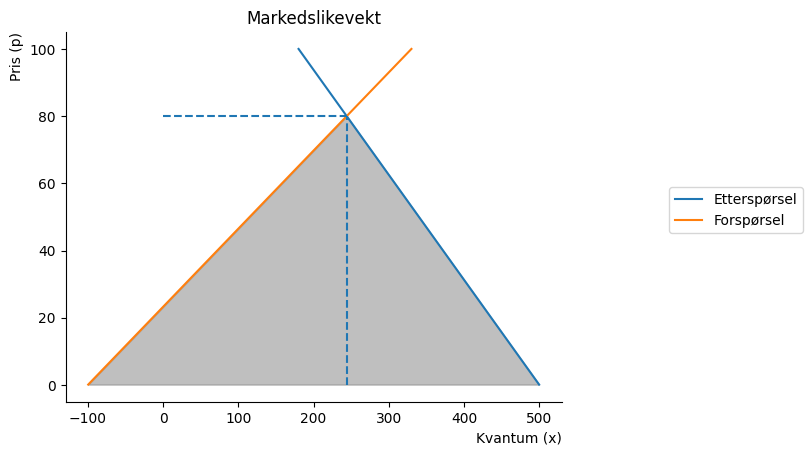

In [170]:
#define functions for demand and supply
def demand(p):
    return 500 - 3.2*(p)

def supply(p,t):
    return -100 + 4.3*(p-t)

p,t = sp.symbols('p t', real=True, positive=True)
equ = sp.Eq(demand(p), supply(p,t))
equ

x_eq=sp.solve(equ, p)
x_eq[0]

p_eq=demand(x_eq[0])
p_eq

x_eq_fn=sp.lambdify(
    (t, p), 
    x_eq[0]
)

x_eq_fn(p,t)
x_eq_fn(0,0)

p_eq_fn=sp.lambdify(
    (t,p), 
    p_eq
)

p_eq_fn(t,p)
p_eq_fn(0,0)

q = np.linspace(0,244,100)
x_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                # ax.set(xlim=(100,400))
                # ax.set(ylim=(40,100))
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(demand(x_num), x_num, label='Etterspørsel')
ax.plot(supply(x_num, 0), x_num, label='Forspørsel')

#make hlines and vlines
ax.hlines(x_eq_fn(0,0), 0, p_eq_fn(0,0), linestyles='dashed')
ax.vlines(p_eq_fn(0,0), 0, x_eq_fn(0,0), linestyles='dashed')

#fill area between supply and demand
ax.fill_betweenx(x_num, demand(x_num), supply(x_num, 0), where=(demand(x_num) >= supply(x_num, 0)), color='grey', alpha=0.5)

# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));
